In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


In [2]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

In [3]:
#observable = 'dphi'
#observable = 'jetpt'
#observable = 'qt'
observable = 'jeteta'

symbol = {}
symbol['dphi'] = '$\Delta\phi$ '
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$'

y = {} 
x = {} 
xerr = {}

altmc = 'Django'
mc = 'Rapgap'
names = {}
names['nominal'] = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,mc)
names['sys0']    = 'outputfiles/CrossSection_%s_%s_sys_0_ep0607_data_nominal.npy'%(observable,mc)
names['sys1']   =  'outputfiles/CrossSection_%s_%s_sys_1._ep0607_data_nominal.npy'%(observable,mc)
#names['sys4']   =  'outputfiles/CrossSection_%s_%s_sys_4_ep0607_data_nominal.npy'%(observable,mc)
names['sys5']   =  'outputfiles/CrossSection_%s_%s_sys_5_ep0607_data_nominal.npy'%(observable,mc)
names['sys7']   =  'outputfiles/CrossSection_%s_%s_sys_7_ep0607_data_nominal.npy'%(observable,mc)
#names['sys10']    = 'outputfiles/CrossSection_%s_%s_sys_10_ep0607_data_nominal.npy'%(observable,mc)
names['sys11']    = 'outputfiles/CrossSection_%s_%s_sys_11_ep0607_data_nominal.npy'%(observable,mc)
names['model']   = 'outputfiles/CrossSection_%s_%s_nominal_ep0607_data_nominal.npy'%(observable,altmc)


label = {}
label['test'] = 'repeat'
label['sys0'] = 'HFS scale (in jet)'
label['sys1'] = 'HFS scale (remainder)'
label['sys4'] = 'HFS polar angle'
label['sys5'] = 'HFS $\phi$ angle' 
label['sys7'] = 'Lepton energy scale'
label['sys10'] = 'Lepton polar angle'
label['sys11'] = 'Lepton $\phi$ angle'
label['nonclosure'] = 'Non-closure'

label['model'] = 'Model'
#names['sys10']   =  'CrossSection_jetpt_Django_nominal_em0405_data_nominal.npy'

In [4]:
with open('outputfiles/NonClosure_dphi_%s.npy'%(mc) , 'rb') as f:
    nonclosure_dphi = np.load(f)
with open('outputfiles/NonClosure_jeteta_%s.npy'%(mc) , 'rb') as f:
    nonclosure_jeteta = np.load(f)    
with open('outputfiles/NonClosure_jetpt_%s.npy'%(mc) , 'rb') as f:
    nonclosure_jetpt = np.load(f)    
with open('outputfiles/NonClosure_jetqt_%s.npy'%(mc) , 'rb') as f:
    nonclosure_jetqt = np.load(f)    
print(nonclosure_dphi)
print(nonclosure_jeteta)
print(nonclosure_jetqt)
print(nonclosure_jetpt)


[1.06761948 0.96643679 0.96547235 0.96464255 0.97394117 0.98175984
 1.01334331]
[0.96390954 1.00302804 1.00638566 1.01455819 1.07225259]
[1.15969678 0.93755347 0.92512647 0.96367023 0.98142731 1.04544313
 1.09880934]
[0.97954236 1.00745236 1.0422301  1.02609709 1.04803611 1.06624338]


In [5]:

for key in names.keys():
    with open('%s'%names[key], 'rb') as f:
        print(key)
        y[key] = np.load(f)
        x[key] = np.load(f)

        xerr[key] = np.load(f)
        
        print('y = ',y[key])
        print('x = ', x[key])
        #print(xerr[key])

nominal
y =  [0.28108188 0.61263507 0.36154574 0.12097345 0.05256944]
x =  [-0.65  0.05  0.75  1.45  2.15]
sys0
y =  [0.27765892 0.61150391 0.3651233  0.12248932 0.05193203]
x =  [-0.65  0.05  0.75  1.45  2.15]
sys1
y =  [0.28229626 0.61398687 0.36167379 0.12064759 0.05013633]
x =  [-0.65  0.05  0.75  1.45  2.15]
sys5
y =  [0.27880055 0.6104096  0.3667316  0.12148722 0.05133384]
x =  [-0.65  0.05  0.75  1.45  2.15]
sys7
y =  [0.28218476 0.60217455 0.36438688 0.12664323 0.05332549]
x =  [-0.65  0.05  0.75  1.45  2.15]
sys11
y =  [0.27949112 0.61548764 0.36468418 0.11988371 0.04911011]
x =  [-0.65  0.05  0.75  1.45  2.15]
model
y =  [0.2928633  0.60436843 0.36168154 0.12265295 0.04709685]
x =  [-0.65  0.05  0.75  1.45  2.15]


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


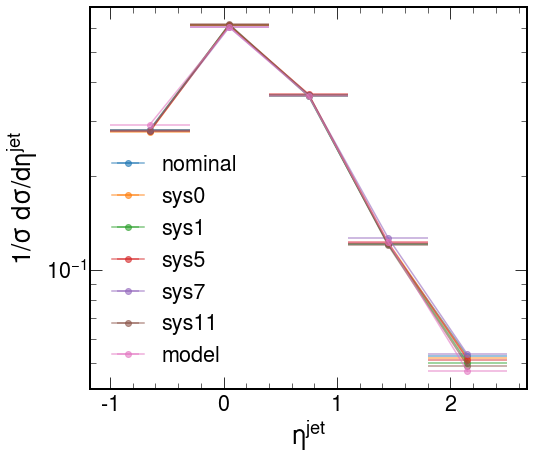

In [6]:
fig,ax = plt.subplots(figsize=(8,7))
for key in names.keys():
    plt.errorbar(x[key],y[key],xerr=xerr[key],fmt='o-',label=key,alpha=0.6)
    plt.yscale('log')
    #plt.xscale('log')
    
    plt.legend()
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

plt.tight_layout()
fig.savefig('figures/Systematic uncertainties_variations_%s.png'%observable)


In [7]:
##add 10% non closure systematics

In [8]:
#nonclosure_sys = 1.10
if 'dphi' in observable:
    nonclosure_sys = nonclosure_dphi
elif 'eta' in observable:
    nonclosure_sys = nonclosure_jeteta
elif 'qt' in observable:
    nonclosure_sys  = nonclosure_jetqt
elif 'pt' in observable:
    nonclosure_sys = nonclosure_jetpt
##if 'dphi' in observable or 'eta' in observable:
##    nonclosure_sys = 1.05
    
y['nonclosure'] = y['nominal']*nonclosure_sys
print (y.keys())

dict_keys(['nominal', 'sys0', 'sys1', 'sys5', 'sys7', 'sys11', 'model', 'nonclosure'])


## Plot Systematic uncertainty

sys0
sys1
sys5
sys7
sys11
model
nonclosure


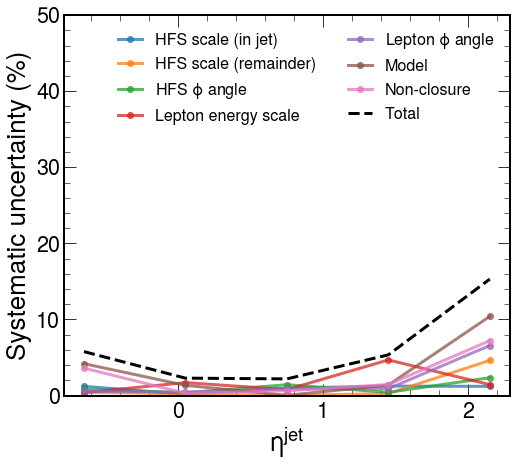

In [9]:
fig,ax = plt.subplots(figsize=(8,7))

total = np.zeros(len(y['nominal']))
ratio = {}

for key in y.keys():
    if 'nominal' in key:continue
    print (key)
    ratio[key] = np.divide(y[key],y['nominal']) -1
    total += ratio[key]*ratio[key]
    plt.plot(x['nominal'],100*abs(ratio[key]),'o-',label=label[key],lw=3,alpha=0.75)

total = np.sqrt(total)
N      = np.multiply( y['nominal'], xerr['nominal']*2.0)
#plt.plot(x['nominal'],100*np.sqrt(1/N), 'o--',label = 'stat error ',lw=3)
plt.plot(x['nominal'],100*total, '--',label = 'Total',lw=3,color='k')

plt.ylabel('Systematic uncertainty (%)')
plt.legend(loc='best',fontsize=16,ncol=2)
plt.xlabel(symbol[observable])

if 'qt' in observable  :
    plt.xscale('log')
plt.ylim([0,50])
plt.show()


fig.savefig('figures/Systematic uncertainties_%s.png'%observable)


In [10]:
with open('outputfiles/ResultwithSystematicUncertainties_%s.npy'%(observable), 'wb') as f:
    np.save(f,x['nominal'])
    np.save(f,y['nominal'])
    np.save(f,xerr['nominal'])
    np.save(f, total)
